In [49]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
stopwords = stopwords.words("English")
import re
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display


In [50]:
feelings = pd.read_csv('D:/Maestria Analistica Estrategica de Datos/II semestre/NLP/emotion.txt', sep=';', header=None)
feelings = feelings.rename(columns={0:'Text',
                                   1:'feel'})
feelings.head()

,Text,feel
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [51]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r'[W\d_]+', " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

feelings['pp'] = feelings.Text.apply(lambda texto: pre_procesado(texto))

feelings.head()

,Text,feel,pp
0,im feeling rather rotten so im not very ambiti...,sadness,im feeling rather rotten im ambitious right
1,im updating my blog because i feel shitty,sadness,im updating blog feel shitty
2,i never make her separate from me because i do...,sadness,never make separate ever want feel like ashamed
3,i left with my bouquet of red and yellow tulip...,joy,left bouquet red yellow tulips arm feeling sli...
4,i was feeling a little vain when i did this one,sadness,feeling little vain one


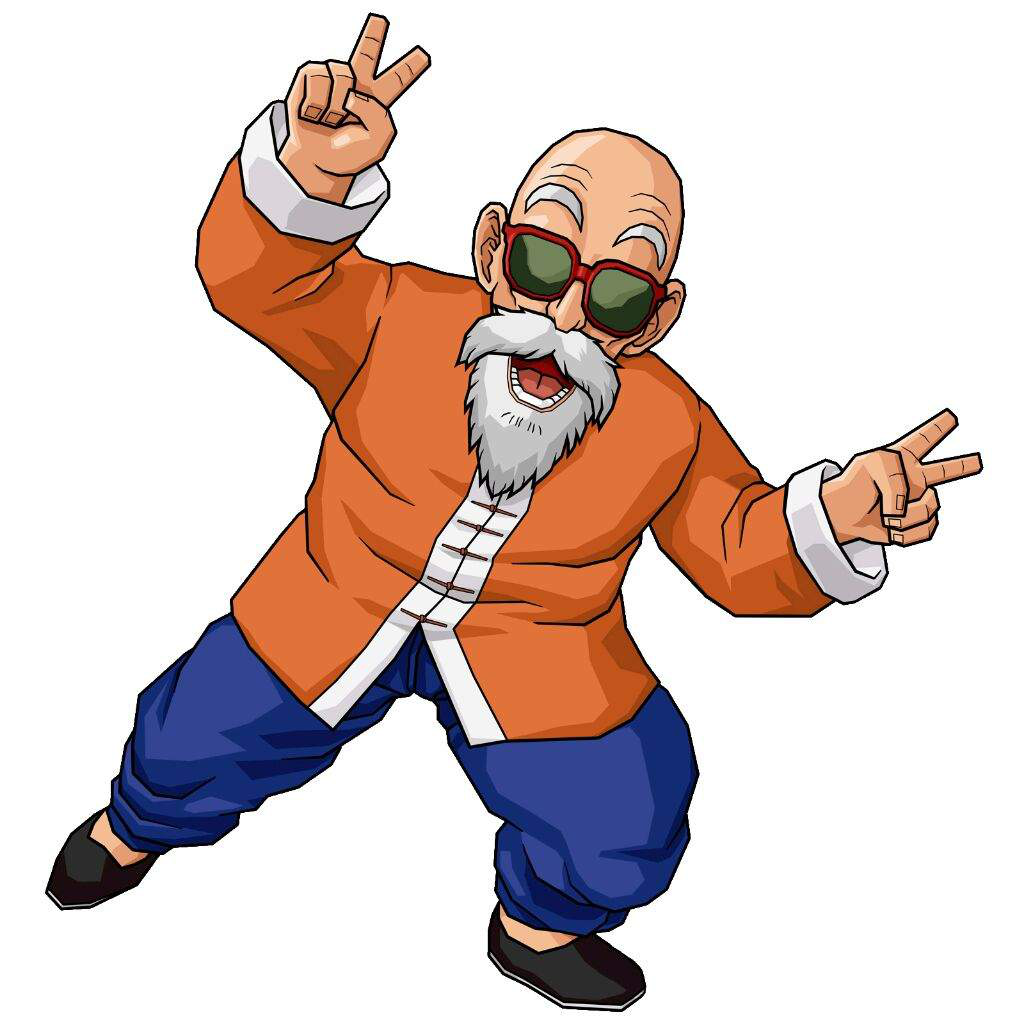

In [56]:
img = PIL.Image.open("D:/Maestria Analistica Estrategica de Datos/II semestre/NLP/3088a72e09f5f0024926266d8ee1266f9598a1f7_hq.png")
mask = np.array(img)
display(img)


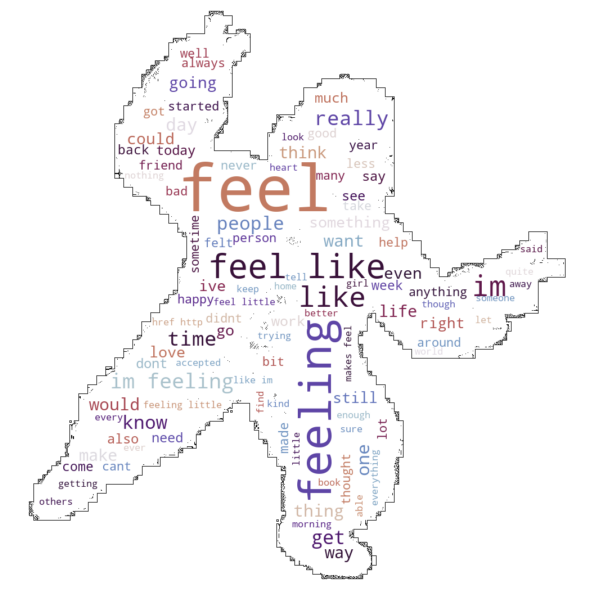

In [80]:
words = feelings.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150,
                      max_words=100,
                      background_color="white",
                      stopwords=stopwords, collocations=True,
                      colormap="twilight_shifted",
                      mask=mask,
                      contour_width=0.5,contour_color='black').generate(words)

# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#image_colors=ImageColorGenerator(mask) #agregar color de las imagenes
wordcloud.to_file("3088a72e09f5f0024926266d8ee1266f9598a1f7_hq.png")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #quita metricas del contorno
plt.tight_layout(pad=0) #quita contorno
plt.show()





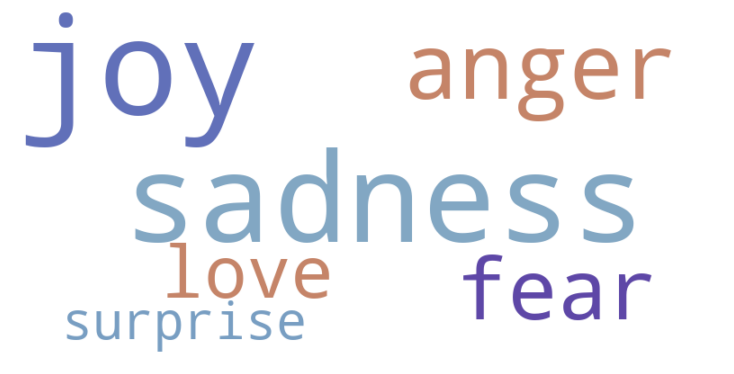

In [84]:
f = feelings.feel.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, #tamaño de la fuente 
                      max_words=100, #maximo de palabras
                      background_color="white", #color del fondo 
                      colormap="twilight_shifted", #color de la fuente
                      stopwords=stopwords).generate(f) #stopwords=stopwords, me saca de una vez las albras vacias en caso de no hacerlo antes


# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #quita metricas del contorno
plt.tight_layout(pad=0) #quita contorno
plt.show()


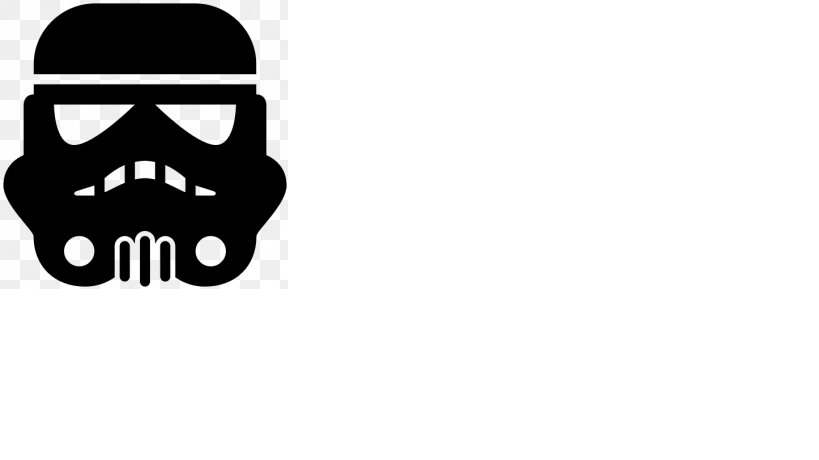

In [101]:
img2 = PIL.Image.open("D:/Maestria Analistica Estrategica de Datos/II semestre/NLP/clone.PNG")
mask2 = np.array(img2)
display(img2)


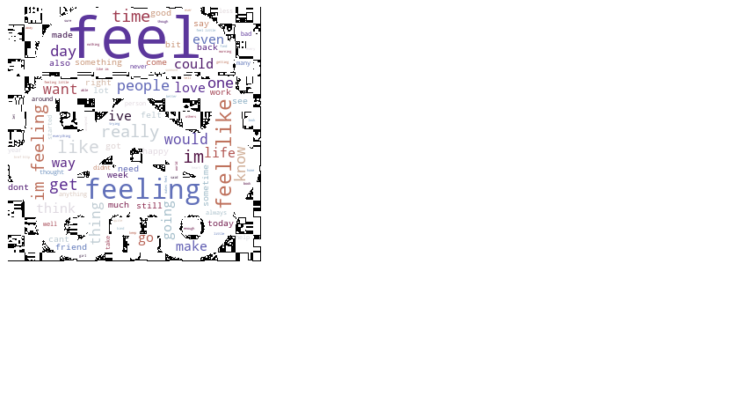

In [105]:
words = feelings.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=500,
                      max_font_size=150,
                      max_words=100,
                      background_color="white",
                      stopwords=stopwords, collocations=True,
                      colormap="twilight_shifted",
                      mask=mask2,
                      contour_width = 1,
                      contour_color='black').generate(words)

# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#image_colors=ImageColorGenerator(mask2) #agregar color de las imagenes
#wordcloud.to_file("clone.PNG")
image = wordcloud.to_image()
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #quita metricas del contorno
plt.tight_layout(pad=0) #quita contorno
plt.show()